In [9]:
import pandas as pd
from textblob import TextBlob, Word, Blobber
import matplotlib.pyplot as plt
import glob

In [42]:
# Read in pre-election headlines data
speech_text = []
years = []
for filename in glob.glob('./Modi_Speeches/*.txt'):
    with open(filename, encoding='ISO-8859-1') as f:
        text = f.read()
        speech_text.append(text)
        years.append(filename)
    
speeches = pd.DataFrame()
speeches['Year'] = years
speeches['Speech'] = speech_text

speeches['Year'] = speeches['Year'].map(lambda x: x.lstrip('./Modi_Speeches/').rstrip('.txt'))
speeches['Year']= pd.to_datetime(speeches['Year'])

speeches.shape

(20, 2)

In [43]:
def detect_polarity(text):
    '''
    Applies sentiment analysis to a piece of text.
    Returns polarity with 1 as pos and 0 as neg.
    '''
    return TextBlob(text).sentiment.polarity

In [44]:
# Find polarity of each headline in pre-election dataset
polarity = []
for i in range(speeches.shape[0]):
    polarity.append(detect_polarity(speeches.iloc[i,1]))

len(polarity)

20

In [45]:
speeches['Polarity'] = polarity
print('Modi Speeches Average Sentiment', speeches['Polarity'].mean())

Modi Speeches Average Sentiment 0.1732956215155747


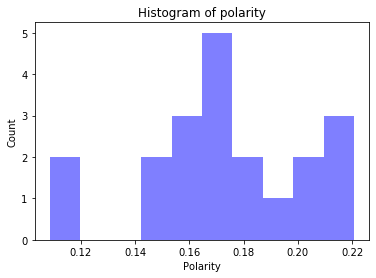

In [46]:
num_bins = 10
n, bins, patches = plt.hist(speeches.Polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show()

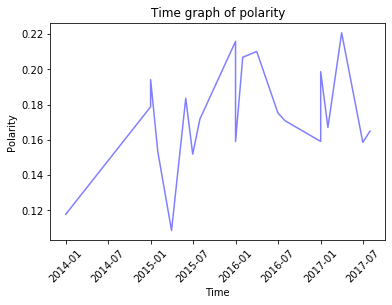

In [51]:
speeches = speeches.sort_values('Year', ascending=True)

plt.plot(speeches['Year'], speeches['Polarity'], color='blue', alpha=0.5)
plt.xlabel('Time')
plt.xticks(rotation=45) 
plt.ylabel('Polarity')
plt.title('Time graph of polarity')
plt.show()